In [22]:
import pandas as pd
from mlxtend.preprocessing import OnehotTransactions,TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import numpy as np

In [23]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [34]:
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [35]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


In [36]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
1,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
2,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
4,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf
5,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.6


In [25]:
support=rules.support.values
confidence=rules.confidence.values

In [26]:
import matplotlib.pyplot as plt
import seaborn as sb

In [27]:
print(support)
print(confidence)

[0.6 0.6 0.6 0.6 0.6 0.6]
[1.   0.75 1.   0.75 1.   0.75]


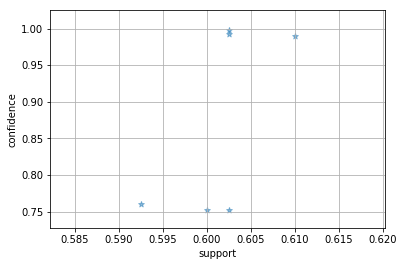

In [28]:
import random 
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.grid()
plt.show()

In [29]:
def draw_graph(rules, rules_to_show):
    import networkx as nx  
    G1 = nx.DiGraph()
   
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])

        for a in rules.iloc[i]['antecedents']:

            G1.add_nodes_from([a])

            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

        for c in rules.iloc[i]['consequents']:

                G1.add_nodes_from([c])

                G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
 
 
   
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

In [30]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion),(Eggs),0.6,0.8,0.6100,0.9900,1.25,0.12,inf
1,(Eggs),(Onion),0.8,0.6,0.5925,0.7600,1.25,0.12,1.6
2,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6025,0.9975,1.25,0.12,inf
3,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6000,0.7525,1.25,0.12,1.6
4,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6025,0.9925,1.25,0.12,inf
5,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6025,0.7525,1.25,0.12,1.6


<Figure size 432x288 with 0 Axes>

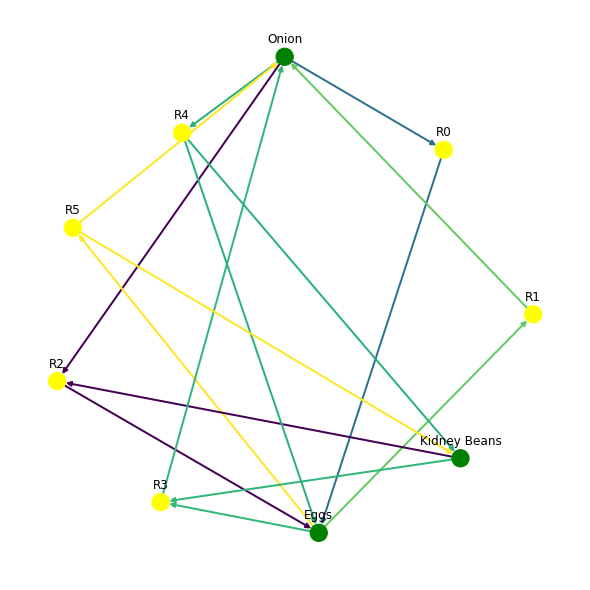

In [31]:
plt.gcf().clear()
plt.figure(figsize=(8,8))
draw_graph (rules, 6) 
plt.show()

In [32]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion),(Eggs),0.6,0.8,0.6100,0.9900,1.25,0.12,inf
1,(Eggs),(Onion),0.8,0.6,0.5925,0.7600,1.25,0.12,1.6
2,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6025,0.9975,1.25,0.12,inf
3,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6000,0.7525,1.25,0.12,1.6
4,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6025,0.9925,1.25,0.12,inf


In [33]:
dataset

[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
 ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]